## Outlier Removal using IQR Method
Outlier detection and removal using the Interquartile Range (IQR) method is a robust statistical technique that identifies and handles outliers based on the spread of the data. The IQR is a measure of statistical dispersion, representing the range between the first quartile (Q1) and the third quartile (Q3) of a dataset. Outliers are identified as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where k is a user-defined threshold.

Here are the steps involved in outlier detection and removal using the IQR method:

### IQR Calculation:

1. **Calculate the First Quartile (Q1) and Third Quartile (Q3):**
   - Find the values that separate the lower 25% and upper 75% of the dataset, respectively.

2. **Calculate the Interquartile Range (IQR):**
   - IQR = Q3 - Q1

### Outlier Identification:

3. **Set a Threshold for Outliers:**
   - Choose a threshold multiplier (often denoted as k) to determine the range for identifying outliers.

4. **Identify Outliers:**
   - Data points below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.

### Outlier Removal:

5. **Remove or Impute Outliers:**
   - Remove the identified outliers from the dataset or impute them with a suitable replacement.

IQR-based outlier detection is less sensitive to extreme values compared to the Z-score method, making it suitable for datasets with skewed distributions or heavy tails.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
657,7.60,23.0,0
924,6.85,23.0,1
695,6.75,11.0,1
807,7.16,19.0,1
553,7.46,17.0,0


[]

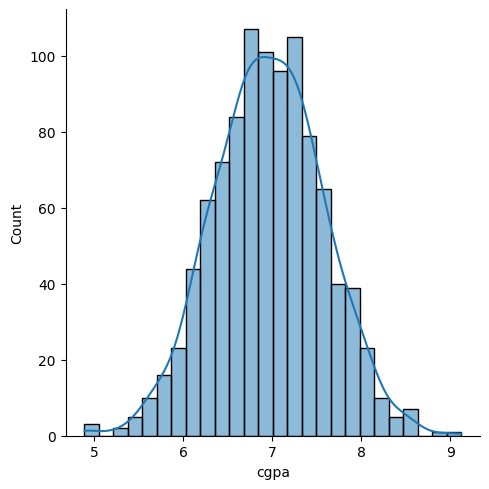

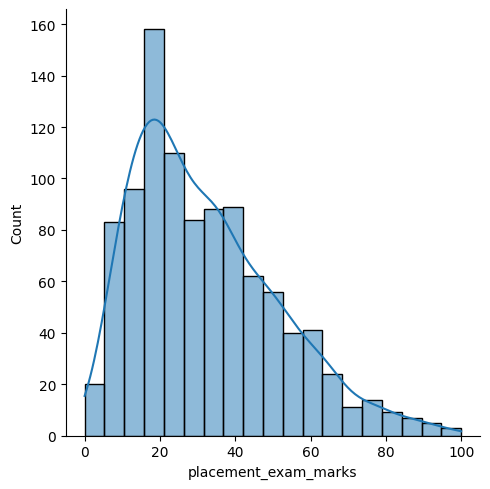

In [5]:
sns.displot(df['cgpa'], kde=True)
sns.displot(df['placement_exam_marks'], kde=True)
plt.plot()

In [6]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

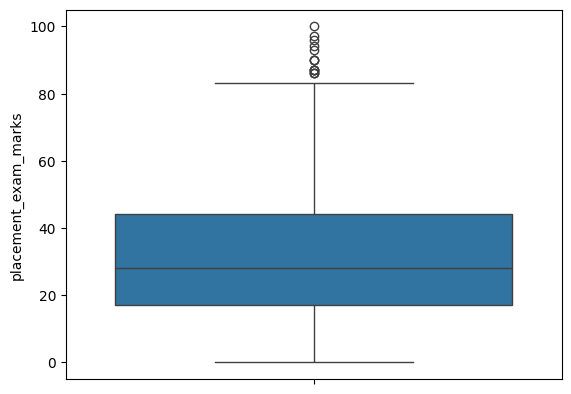

In [7]:
sns.boxplot(df['placement_exam_marks'])

In [8]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)
print(percentile25)
print(percentile75)

17.0
44.0


In [9]:
iqr = percentile75 - percentile25
iqr

27.0

In [10]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print(upper_limit)
print(lower_limit)

84.5
-23.5


**Finding Outliers**

In [11]:
df[(df['placement_exam_marks']>upper_limit) | (df['placement_exam_marks']<lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


**Trimming**

In [12]:
new_df = df[(df['placement_exam_marks']>=lower_limit) & (df['placement_exam_marks']<=upper_limit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\Probal\AppData\Local\Temp\ipykernel_43864\3798459719.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\Probal\AppData\Local\Temp\ipykernel_43864\3798459719.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


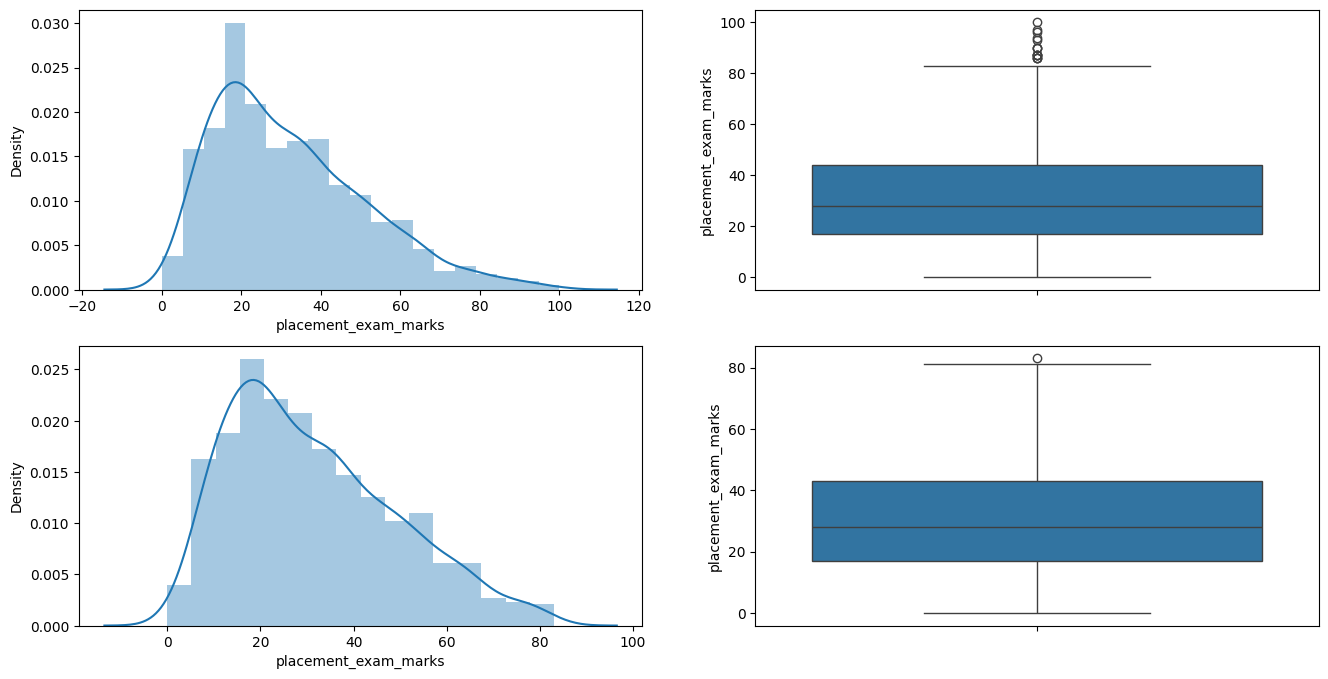

In [24]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

**Capping**

In [25]:
new_df_cap = df.copy()

In [26]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks']>upper_limit, upper_limit,
    np.where(
        new_df_cap['placement_exam_marks']<lower_limit, lower_limit, new_df_cap['placement_exam_marks']
    )
)

In [27]:
new_df_cap.shape

(1000, 3)

C:\Users\Probal\AppData\Local\Temp\ipykernel_43864\3538926932.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\Probal\AppData\Local\Temp\ipykernel_43864\3538926932.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


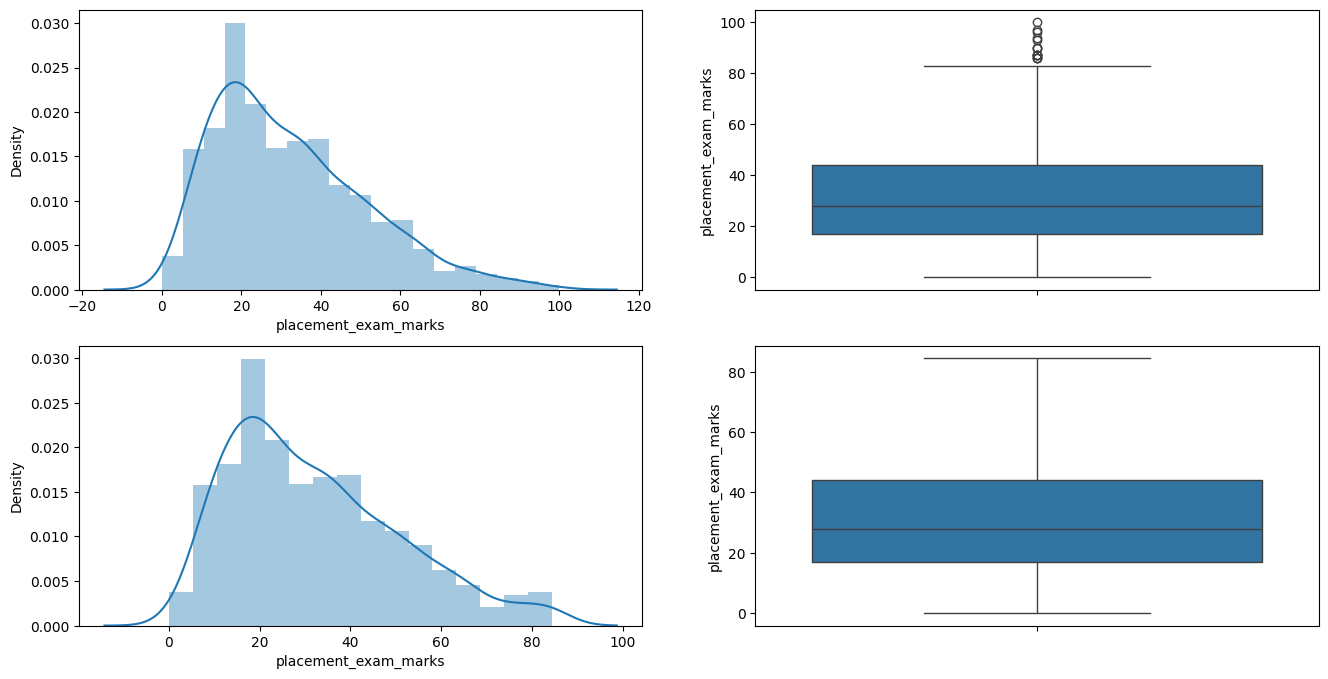

In [29]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()